In [36]:
import pandas as pd
import numpy as np
import pandas_flavor as pfl
from matplotlib import pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
#setting display options 

pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)

In [3]:
zillow_df = pd.read_csv('../raw_data/zillow_data.csv')

In [4]:
zillow_regiondf = zillow_df[['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName']]
zillow_regiondf.head(2)

,RegionID,RegionName,City,State,Metro,CountyName
0,84654,60657,Chicago,IL,Chicago,Cook
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin


In [5]:
#transposing zillow dataframe 
zillow_transpose_df = zillow_df.T

#changing the name of columns to RegionName or zipcodes
zillow_transpose_df.columns = zillow_transpose_df.iloc[1].tolist()

#cutting out rows not necessary for our data
zillow_cleandf = zillow_transpose_df.iloc[7:]

#converting index to datetimeindex
zillow_cleandf.index = pd.to_datetime(zillow_cleandf.index, format = '%Y-%m')

#changing name of index
zillow_cleandf.index.name = 'Date_index'

#casting all columns to numeric
zillow_cleandf = zillow_cleandf.apply(pd.to_numeric)

In [76]:
zillow_cleandf.head()

,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10011,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,10456,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,60611,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,11238,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,27834,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,...,14804,44093,1011,6027,50233,62218,84328,56382,67001,67428,3084,3230,13026,42436,45889,46985,58059,22713,46165,79355,48761,61747,3777,18915,55924,3583,47948,12726,23433,54921,31829,98645,45881,62048,61841,43540,57018,49318,8006,1092,11958,55324,55722,62338,31097,43432,68523,2812,37688,80827,97886,56569,12959,37118,48760,67437,12513,10518,12423,14008,44449,13807,11739,21645,8328,24325,59846,1245,3846,56570,72845,13028,61870,3816,1008,58042,38560,66956,6796,53911,45339,3745,21521,46764,62545,33855,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,19964,62539,24530,38362,62440,98358,3268,80819,99123,92339,1366,62094,67070,3450,37141,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,93664,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,66023,98351,10501,16836,31561,43013,56041,1368,53550,46987,56176,56314,61488,95636,8317,57035,12824,21662,3853,3605,43445,50106,61733,94970,21671,49638,87540,12175,49716,8241,3740,3875,21869,56010,17006,21657,6090,52728,55065,25843,20674,97011,68633,98279,56578,12153,61572,15083,93529,52341,49725,56120,98940,45326,91008,4066,84726,80515,98925,49718,43525,80428,96148,28611,83846,93517,28775,80456,1255,85611,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,83821,29915,49768,3215,28039,97733,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200.0,235700.0,210400.0,498100.0,77300.0,95000.0,152900.0,216500.0,95400.0,766000.0,162000.0,101000.0,252400.0,190500.0,112400.0,152500.0,122700.0,97900.0,138900.0,142600.0,NaN,3676700.0,141400.0,138500.0,126100.0,119700.0,69900.0,139200.0,90900.0,94300.0,340600.0,123900.0,169600.0,178800.0,100800.0,154300.0,NaN,72000.0,149600.0,98200.0,297900.0,189800.0,111400.0,83100.0,120400.0,147300.0,180100.0,230100.0,93400.0,255700.0,148900.0,135200.0,285200.0,125000.0,184400.0,183900.0,95400.0,301600.0,191000.0,99000.0,3373

* **Our data is monthly and resampling the data yearly will show us the average change in housing prices**

In [120]:
#resampling yearly average data
zillow_yr_df = zillow_cleandf.resample('YS').mean()
zillow_yr_df.head(3)

,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10011,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,10456,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,60611,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,11238,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,27834,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,...,14804,44093,1011,6027,50233,62218,84328,56382,67001,67428,3084,3230,13026,42436,45889,46985,58059,22713,46165,79355,48761,61747,3777,18915,55924,3583,47948,12726,23433,54921,31829,98645,45881,62048,61841,43540,57018,49318,8006,1092,11958,55324,55722,62338,31097,43432,68523,2812,37688,80827,97886,56569,12959,37118,48760,67437,12513,10518,12423,14008,44449,13807,11739,21645,8328,24325,59846,1245,3846,56570,72845,13028,61870,3816,1008,58042,38560,66956,6796,53911,45339,3745,21521,46764,62545,33855,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,19964,62539,24530,38362,62440,98358,3268,80819,99123,92339,1366,62094,67070,3450,37141,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,93664,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,66023,98351,10501,16836,31561,43013,56041,1368,53550,46987,56176,56314,61488,95636,8317,57035,12824,21662,3853,3605,43445,50106,61733,94970,21671,49638,87540,12175,49716,8241,3740,3875,21869,56010,17006,21657,6090,52728,55065,25843,20674,97011,68633,98279,56578,12153,61572,15083,93529,52341,49725,56120,98940,45326,91008,4066,84726,80515,98925,49718,43525,80428,96148,28611,83846,93517,28775,80456,1255,85611,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,83821,29915,49768,3215,28039,97733,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-01-01,338444.444444,230988.888889,206655.555556,503444.444444,77455.555556,95733.333333,152211.111111,217266.666667,96255.555556,7.883444e+05,163833.333333,99800.000000,251422.222222,192633.333333,114000.000000,152644.444444,122033.333333,98888.888889,138988.888889,141988.888889,NaN,3.791967e+06,140822.222222,140955.555556,127877.777778,119966.666667,68888.888889,135711.111111,91255.555556,93711.111111,347055.555556,123900.000000,169522.222222,180466.666667,101333.333333,154455.555556,NaN,75222.222222,147344.444444,100588.

In [9]:
from criteria_housing import name_zipcode_area, return_plotter

In [142]:
#average profit margin trend
zillow_yr_return = zillow_yr_df.pct_change().dropna().diff()
zillow_yr_return.head(2)

,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10011,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,10456,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,60611,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,11238,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,27834,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,...,14804,44093,1011,6027,50233,62218,84328,56382,67001,67428,3084,3230,13026,42436,45889,46985,58059,22713,46165,79355,48761,61747,3777,18915,55924,3583,47948,12726,23433,54921,31829,98645,45881,62048,61841,43540,57018,49318,8006,1092,11958,55324,55722,62338,31097,43432,68523,2812,37688,80827,97886,56569,12959,37118,48760,67437,12513,10518,12423,14008,44449,13807,11739,21645,8328,24325,59846,1245,3846,56570,72845,13028,61870,3816,1008,58042,38560,66956,6796,53911,45339,3745,21521,46764,62545,33855,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,19964,62539,24530,38362,62440,98358,3268,80819,99123,92339,1366,62094,67070,3450,37141,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,93664,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,66023,98351,10501,16836,31561,43013,56041,1368,53550,46987,56176,56314,61488,95636,8317,57035,12824,21662,3853,3605,43445,50106,61733,94970,21671,49638,87540,12175,49716,8241,3740,3875,21869,56010,17006,21657,6090,52728,55065,25843,20674,97011,68633,98279,56578,12153,61572,15083,93529,52341,49725,56120,98940,45326,91008,4066,84726,80515,98925,49718,43525,80428,96148,28611,83846,93517,28775,80456,1255,85611,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,83821,29915,49768,3215,28039,97733,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [143]:
trending_zipcodes = zillow_yr_return.pct_change().dropna().diff().mean().sort_values(ascending=False)
trending_zipcodes[:10]

29163    41047.792328
16124     8172.443413
91932     2173.867900
16051     1736.504018
23120     1448.618669
47235     1311.289133
27205     1193.702587
32806     1063.635736
70507     1059.610402
22124      832.896683
dtype: float64

In [140]:
zillow_yr_avg[95].pct_change().dropna().diff().mean()

0.005878450724491356

In [138]:
zillow_regiondf[zillow_regiondf['City']=='San Jose']

,RegionID,RegionName,City,State,Metro,CountyName
244,97991,95123,San Jose,CA,San Jose,Santa Clara
513,97980,95112,San Jose,CA,San Jose,Santa Clara
536,97993,95125,San Jose,CA,San Jose,Santa Clara
1276,97992,95124,San Jose,CA,San Jose,Santa Clara
1595,98004,95136,San Jose,CA,San Jose,Santa Clara
1657,97995,95127,San Jose,CA,San Jose,Santa Clara
1714,97979,95111,San Jose,CA,San Jose,Santa Clara
1861,97994,95126,San Jose,CA,San Jose,Santa Clara
2127,97997,95129,San Jose,CA,San Jose,Santa Clara
2274,97996,95128,San Jose,CA,San Jose,Santa Clara


In [122]:
# plt.scatter(h.index, h);

In [118]:
zillow_regiondf[zillow_regiondf['RegionName']==7106]

,RegionID,RegionName,City,State,Metro,CountyName
4211,60610,7106,Newark,NJ,New York,Essex


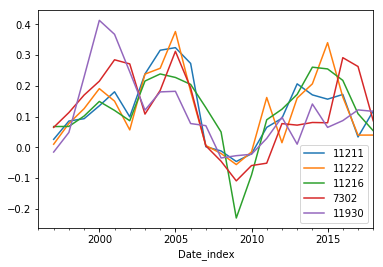

In [13]:
return_plotter(zillow_yr_clean)

In [14]:
# melted = pd.melt(zillow_df, id_vars=['RegionID', 'RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')

In [15]:
# hot_zips = melted.loc[melted['RegionName']==11211]
# hot_zips.plot()

In [16]:
name_zipcode_area(zillow_regiondf, [11211, 11222, 11216, 7302, 11930])

,RegionID,RegionName,City,State,Metro,CountyName
117,62022,11211,New York,NY,New York,Kings
1155,62033,11222,New York,NY,New York,Kings
475,62027,11216,New York,NY,New York,Kings
191,60639,7302,Jersey City,NJ,New York,Hudson
11728,62281,11930,Amagansett,NY,New York,Suffolk


In [17]:
zillow_yr_clean_nonull = zillow_yr_clean.dropna()

In [18]:
zillow_yr_clean_nonull[23192].iloc[0]

120391.66666666667

In [19]:
range_dict = {}
for col in zillow_yr_clean_nonull:
    range_dict[col] = zillow_yr_clean_nonull[col].iloc[-1]-zillow_yr_clean_nonull[col].iloc[0]

sorted(range_dict.items(), key = lambda x : x[1], reverse = True)[:10] 

[(94027, 5259391.666666667),
 (90210, 4599850.0),
 (94301, 3776158.3333333335),
 (33480, 3573425.0),
 (94123, 3472975.0),
 (10128, 3296616.6666666665),
 (94022, 3275000.0),
 (90402, 3087816.666666667),
 (94115, 3084566.666666667),
 (11975, 2880000.0)]

In [20]:
name_zipcode_area(zillow_regiondf, [94027, 90210, 94301, 33480, 94123, 10128, 94022, 90402, 94115, 11975])

,RegionID,RegionName,City,State,Metro,CountyName
10237,97518,94027,Atherton,CA,San Francisco,San Mateo
4816,96086,90210,Beverly Hills,CA,Los Angeles-Long Beach-Anaheim,Los Angeles
5738,97691,94301,Palo Alto,CA,San Jose,Santa Clara
4723,72636,33480,Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach
2026,97577,94123,San Francisco,CA,San Francisco,San Francisco
21,61703,10128,New York,NY,New York,New York
5843,97513,94022,Los Altos,CA,San Jose,Santa Clara
7380,96149,90402,Santa Monica,CA,Los Angeles-Long Beach-Anaheim,Los Angeles
742,97569,94115,San Francisco,CA,San Francisco,San Francisco
13864,62320,11975,Wainscott,NY,New York,Suffolk


* **Two different criteria were used to filter out the zipcodes**
* **Average yearly profit margin and maximum profit margin in 23 years**

* **Average yearly profit margin**

In [21]:
model_one_df = zillow_cleandf[[11211, 11222, 11216, 20001, 19123]]
model_one_df.head()

,11211,11222,11216,20001,19123
Date_index,,,,,
1996-04-01,133200.0,149200.0,146100.0,92000.0,61000.0
1996-05-01,132900.0,148400.0,146600.0,92600.0,60600.0
1996-06-01,132500.0,147500.0,147200.0,93200.0,60300.0
1996-07-01,132200.0,146600.0,147700.0,93900.0,59900.0
1996-08-01,131800.0,146000.0,148400.0,94600.0,59600.0


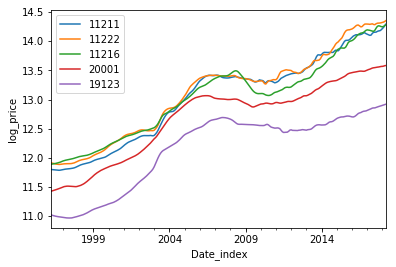

In [22]:
np.log(model_one_df).plot()
plt.ylabel('log_price');